In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import numpy as np

from quintic_generator import QuinticGenerator

from matplotlib import pyplot as plt

In [8]:
quintic_generator = QuinticGenerator()

In [4]:
coeffs = quintic_generator.compute_piecewise_coeffs_per_axes(np.array([2.0, 0.0, 1.0]), np.array([4.0, 3.0, 0.0]), 3.0, 7.0)

In [5]:
# Test if 1d polynomial works
t = np.linspace(3.0, 7.0)
x = np.poly1d(coeffs)
x_d = np.polyder(x, 1)
x_dd = np.polyder(x, 2)
x_ddd = np.polyder(x, 3)

Text(0.5, 1.0, 'Position')

Text(0.5, 1.0, 'Velocity')

Text(0.5, 1.0, 'Acc')

Text(0.5, 1.0, 'Jerk')

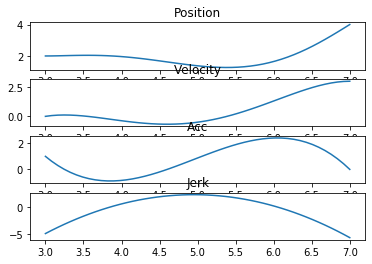

In [6]:
f, ax = plt.subplots(4, 1)
ax[0].plot(t, np.polyval(x, t-3.0))
ax[0].set_title('Position')

ax[1].plot(t, np.polyval(x_d, t-3.0))
ax[1].set_title('Velocity')

ax[2].plot(t, np.polyval(x_dd, t-3.0))
ax[2].set_title('Acc')

ax[3].plot(t, np.polyval(x_ddd, t-3.0))
ax[3].set_title('Jerk')


In [94]:
# Test if 3d polynomial generation works
t_0 = 3.0
t_f = 8.8
x_0 = np.array([0.0, 0.0, 0.0])
x_f = np.array([5.0, 0.0, 0.0])
y_0 = np.array([0.0, 0.0, 0.0])
y_f = np.array([0.0, 0.0, 0.0])
z_0 = np.array([0.0, 0.0, 0.0])
z_f = np.array([-3.0, 0.0, 0.0])

x_coeffs, y_coeffs, z_coeffs = quintic_generator.compute_coeffs(x_0, x_f, y_0, y_f, z_0, z_f, t_0, t_f)
x_coeffs

array([ 0.00457068, -0.06627493,  0.25626307,  0.        ,  0.        ,
        0.        ])

In [84]:
# Visualize results for 3d polynomial generation
t = np.linspace(3.0, 8.8)
x = np.poly1d(x_coeffs)
x_d = np.polyder(x, 1)
x_dd = np.polyder(x, 2)
x_ddd = np.polyder(x, 3)

y = np.poly1d(y_coeffs)
y_d = np.polyder(y, 1)
y_dd = np.polyder(y, 2)
y_ddd = np.polyder(y, 3)

z = np.poly1d(z_coeffs)
z_d = np.polyder(z, 1)
z_dd = np.polyder(z, 2)
z_ddd = np.polyder(z, 3)

Text(0.5, 1.0, 'Position')

Text(0.5, 1.0, 'Velocity')

Text(0.5, 1.0, 'Acc')

Text(0.5, 1.0, 'Jerk')

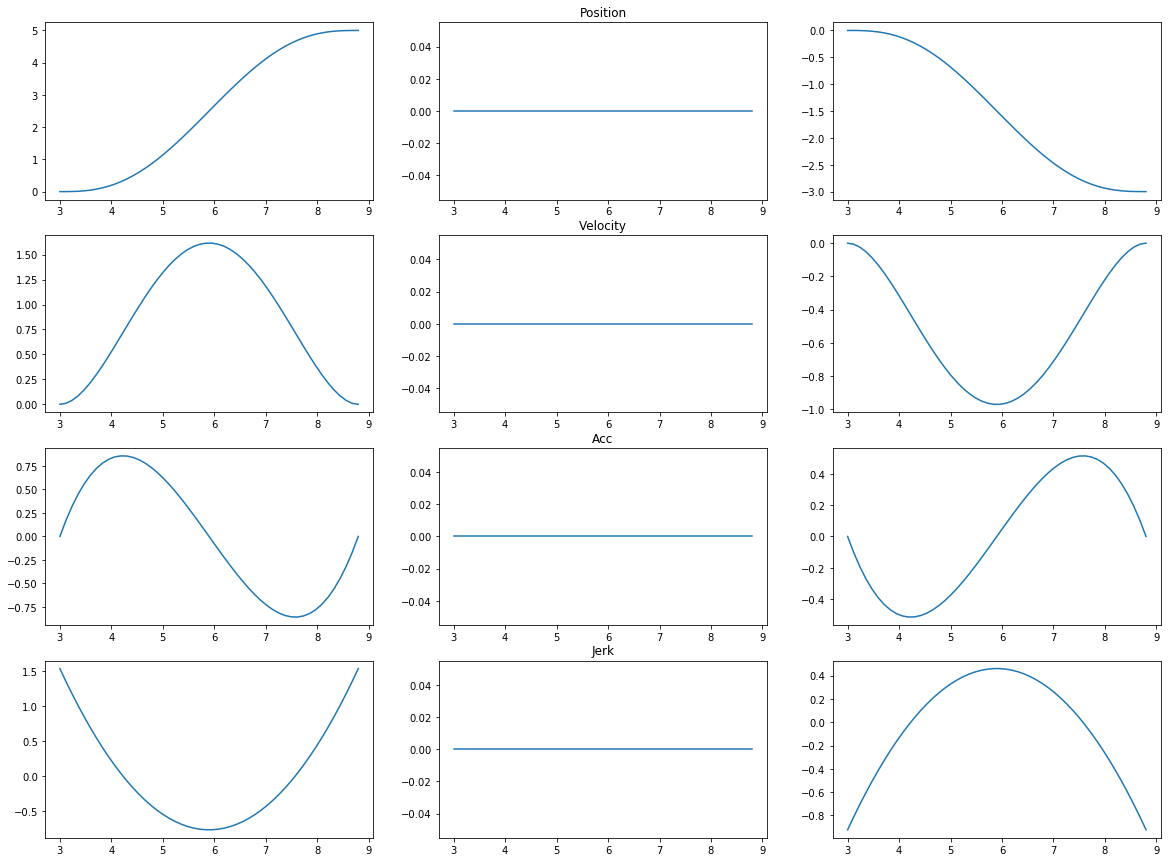

In [85]:
f, ax = plt.subplots(4, 3)
f.set_size_inches(20.0, 15.0)

# Plot x
ax[0][0].plot(t, np.polyval(x, t-3.0))
ax[1][0].plot(t, np.polyval(x_d, t-3.0))
ax[2][0].plot(t, np.polyval(x_dd, t-3.0))
ax[3][0].plot(t, np.polyval(x_ddd, t-3.0))

# Plot y
ax[0][1].plot(t, np.polyval(y, t-3.0))
ax[0][1].set_title('Position')

ax[1][1].plot(t, np.polyval(y_d, t-3.0))
ax[1][1].set_title('Velocity')

ax[2][1].plot(t, np.polyval(y_dd, t-3.0))
ax[2][1].set_title('Acc')

ax[3][1].plot(t, np.polyval(y_ddd, t-3.0))
ax[3][1].set_title('Jerk')

# Plot z
ax[0][2].plot(t, np.polyval(z, t-3.0))
ax[1][2].plot(t, np.polyval(z_d, t-3.0))
ax[2][2].plot(t, np.polyval(z_dd, t-3.0))
ax[3][2].plot(t, np.polyval(z_ddd, t-3.0))

plt.show()


In [96]:
# Test new mission
waypoints = np.transpose(np.array([[0.0, 0.0, 0.0],
                     [5.0, 0.0, -3.0]]))
x_coeffs, y_coeffs, z_coeffs, t_seg = quintic_generator.new_mission(waypoints, 0.3, 0.3)

[[[ 0.  5.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0. -3.]
  [ 0.  0.]
  [ 0.  0.]]]


In [97]:
full_state_waypoints = quintic_generator.get_full_state_waypoints()
full_state_waypoints[0, :, 1]

array([5., 0., 0.])

In [98]:
# Visualize polynomial segment
# Visualize results for 3d polynomial generation
t = np.linspace(0, t_seg[0])
x = np.poly1d(np.squeeze(x_coeffs))
x_d = np.polyder(x, 1)
x_dd = np.polyder(x, 2)
x_ddd = np.polyder(x, 3)

y = np.poly1d(np.squeeze(y_coeffs))
y_d = np.polyder(y, 1)
y_dd = np.polyder(y, 2)
y_ddd = np.polyder(y, 3)

z = np.poly1d(np.squeeze(z_coeffs))
z_d = np.polyder(z, 1)
z_dd = np.polyder(z, 2)
z_ddd = np.polyder(z, 3)

Text(0.5, 1.0, 'Position')

Text(0.5, 1.0, 'Velocity')

Text(0.5, 1.0, 'Acc')

Text(0.5, 1.0, 'Jerk')

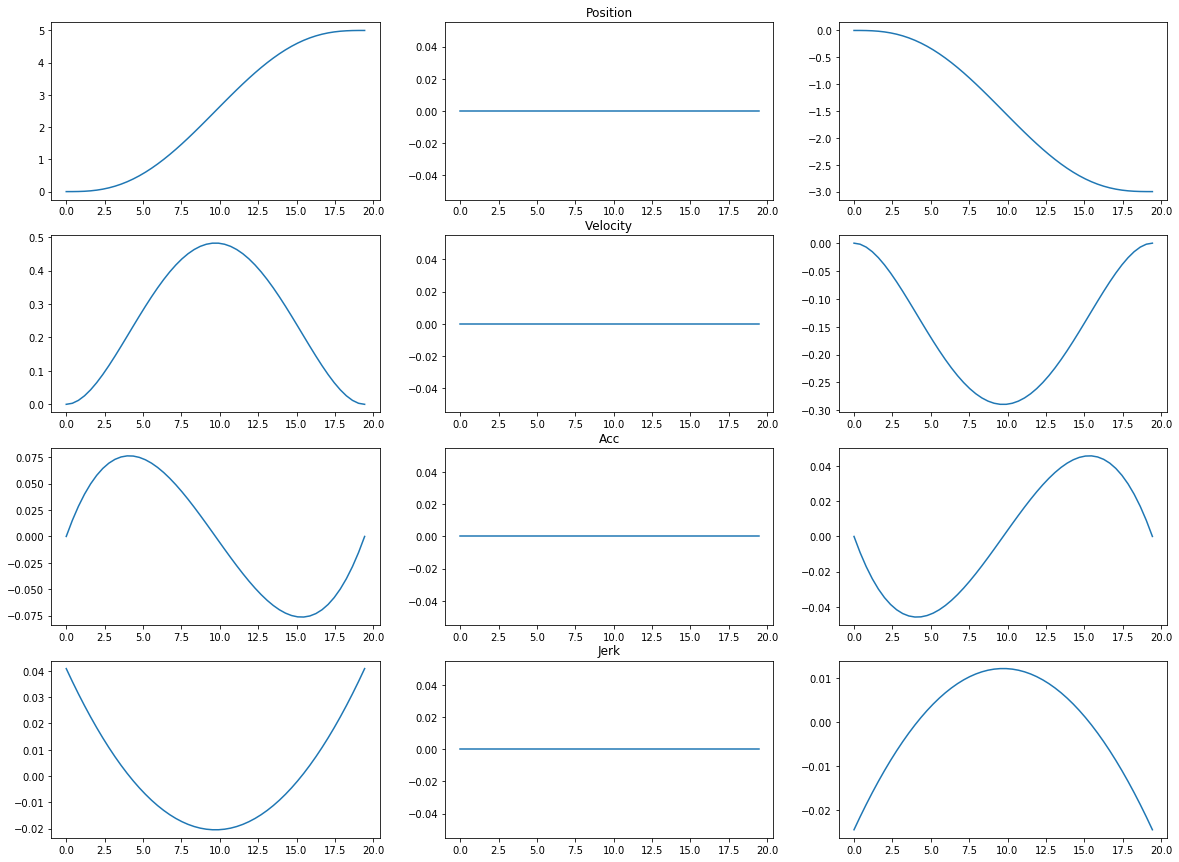

In [99]:
f, ax = plt.subplots(4, 3)
f.set_size_inches(20.0, 15.0)

# Plot x
ax[0][0].plot(t, np.polyval(x, t))
ax[1][0].plot(t, np.polyval(x_d, t))
ax[2][0].plot(t, np.polyval(x_dd, t))
ax[3][0].plot(t, np.polyval(x_ddd, t))

# Plot y
ax[0][1].plot(t, np.polyval(y, t))
ax[0][1].set_title('Position')

ax[1][1].plot(t, np.polyval(y_d, t))
ax[1][1].set_title('Velocity')

ax[2][1].plot(t, np.polyval(y_dd, t))
ax[2][1].set_title('Acc')

ax[3][1].plot(t, np.polyval(y_ddd, t))
ax[3][1].set_title('Jerk')

# Plot z
ax[0][2].plot(t, np.polyval(z, t))
ax[1][2].plot(t, np.polyval(z_d, t))
ax[2][2].plot(t, np.polyval(z_dd, t))
ax[3][2].plot(t, np.polyval(z_ddd, t))

plt.show()


In [107]:
# Check interpolation of trajectory
x_final = np.zeros((3, len(t)))
y_final = np.zeros((3, len(t)))
z_final = np.zeros((3, len(t)))
for i in range(0, len(t)):
    x_i, y_i, z_i = quintic_generator.interpolate_trajectory(x_coeffs, y_coeffs, z_coeffs, t[i], 0)
    x_final[:, i] = np.squeeze(x_i)
    y_final[:, i] = np.squeeze(y_i)
    z_final[:, i] = np.squeeze(z_i)

In [123]:
x_i, y_i, z_i = quintic_generator.interpolate_trajectory(x_coeffs, y_coeffs, z_coeffs, t[i], 0)
x_i[2][0]

6.7433927595197265e-16

Text(0.5, 1.0, 'Position')

Text(0.5, 1.0, 'Velocity')

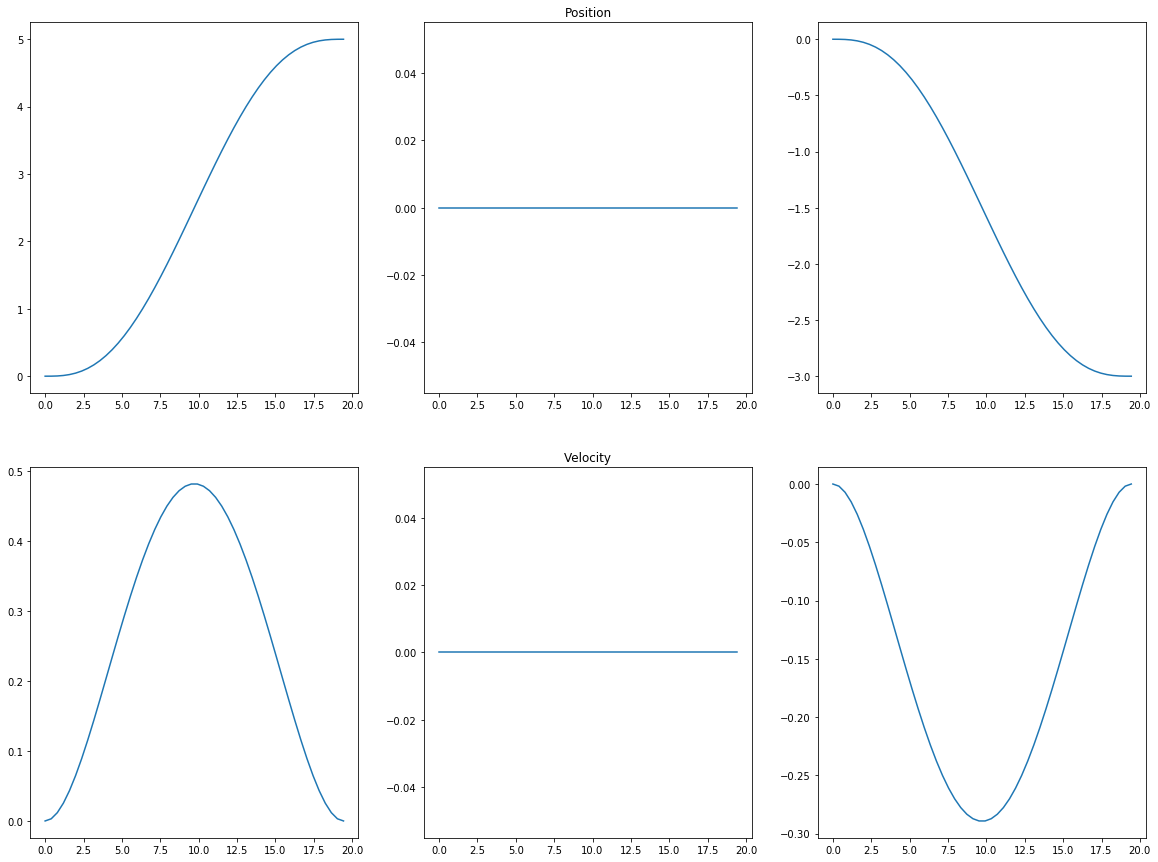

In [110]:
f, ax = plt.subplots(2, 3)
f.set_size_inches(20.0, 15.0)

# Plot x
ax[0][0].plot(t, x_final[0, :])
ax[1][0].plot(t, x_final[1, :])
# ax[2][0].plot(t, np.polyval(x_dd, t))
# ax[3][0].plot(t, np.polyval(x_ddd, t))

# Plot y
ax[0][1].plot(t, y_final[0, :])
ax[0][1].set_title('Position')

ax[1][1].plot(t, y_final[1, :])
ax[1][1].set_title('Velocity')

# ax[2][1].plot(t, np.polyval(y_dd, t))
# ax[2][1].set_title('Acc')

# ax[3][1].plot(t, np.polyval(y_ddd, t))
# ax[3][1].set_title('Jerk')

# Plot z
ax[0][2].plot(t, z_final[0, :])
ax[1][2].plot(t, z_final[1, :])
# ax[2][2].plot(t, np.polyval(z_dd, t))
# ax[3][2].plot(t, np.polyval(z_ddd, t))

plt.show()